In [109]:
import numpy as np
import pandas as pd

In [110]:
df = pd.read_csv('spam (1).csv')

In [111]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
931,ham,Congratulations ore mo owo re wa. Enjoy it and...,NaN,NaN,NaN
276,ham,Tell rob to mack his gf in the theater,NaN,NaN,NaN
4274,ham,Haiyoh... Maybe your hamster was jealous of mi...,NaN,NaN,NaN
4948,ham,I am in bus on the way to calicut,NaN,NaN,NaN
5279,ham,"Helloooo... Wake up..! \Sweet\"" \""morning\"" \""...",NaN,NaN,NaN


In [112]:
df.shape

(5572, 5)

In [113]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [115]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [116]:
df.sample(5)

,v1,v2
3140,ham,Customer place i will call you
1344,ham,Were somewhere on Fredericksburg
4231,ham,I'm at home. Please call
3880,ham,Can you plz tell me the ans. BSLVYL sent via f...
3293,ham,Beautiful tomorrow never comes.. When it comes...


In [117]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1349,spam,FREE2DAY sexy St George's Day pic of Jordan!Tx...
3837,ham,Went to pay rent. So i had to go to the bank t...
195,ham,Gud mrng dear hav a nice day
5290,ham,Dear where you. Call me
353,ham,Yo you guys ever figure out how much we need f...


In [118]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [119]:
df['target'] = encoder.fit_transform(df['target'])

In [120]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [121]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [122]:
# check for duplicate values
df.duplicated().sum()

409

In [123]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [124]:
df.duplicated().sum()

0

In [125]:
df.shape

(5163, 2)

## 2.EDA

In [126]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [127]:
df['target'].value_counts()

target
0    4516
1     647
Name: count, dtype: int64

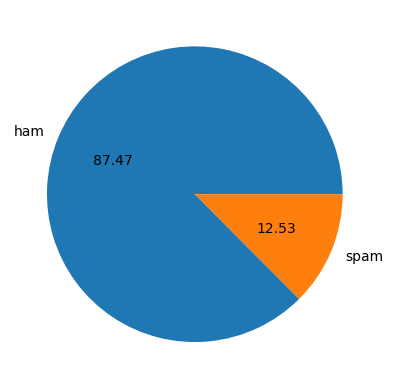

In [128]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [129]:
# Data is imbalanced

In [130]:
import nltk

In [131]:
!pip install nltk

In [132]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tusharsharma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [133]:
df['num_characters'] = df['text'].apply(len)

In [134]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [135]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [136]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [137]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [138]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [139]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5163.000000,5163.000000,5163.000000
mean,78.745884,18.444122,1.963974
std,58.148780,13.327940,1.448008
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [140]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.356067,17.123782,1.820195
std,56.341361,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [141]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,647.000000,647.000000,647.000000
mean,137.306028,27.659969,2.967543
std,30.101927,7.038065,1.490069
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [142]:
import seaborn as sns

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

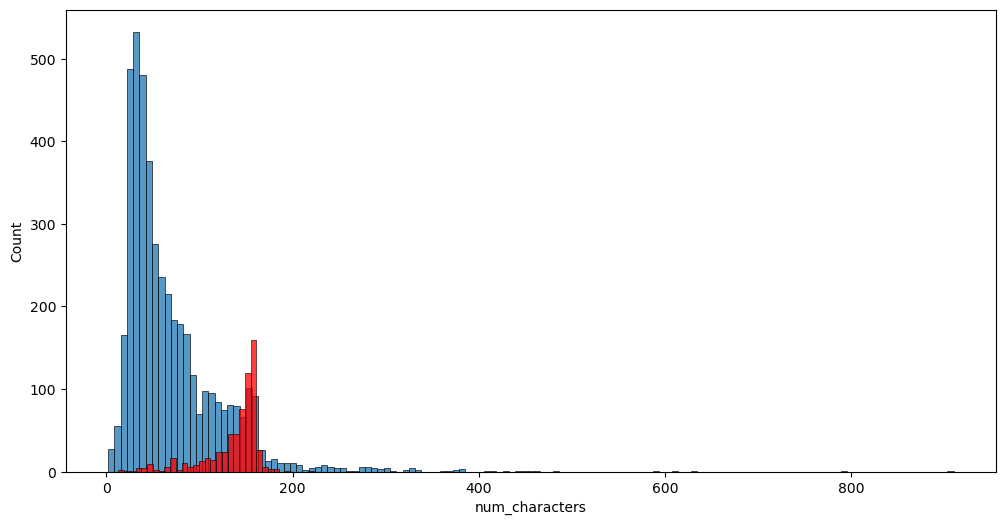

In [143]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

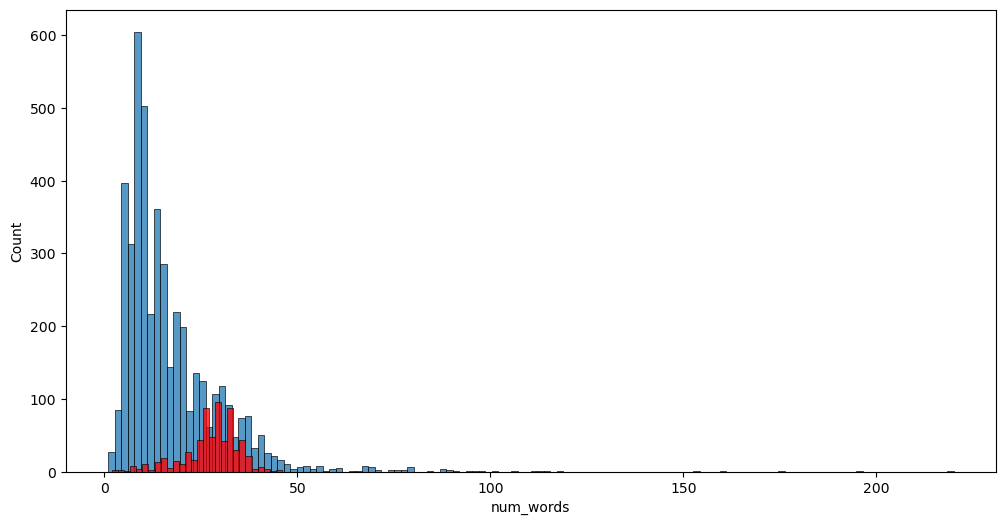

In [144]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


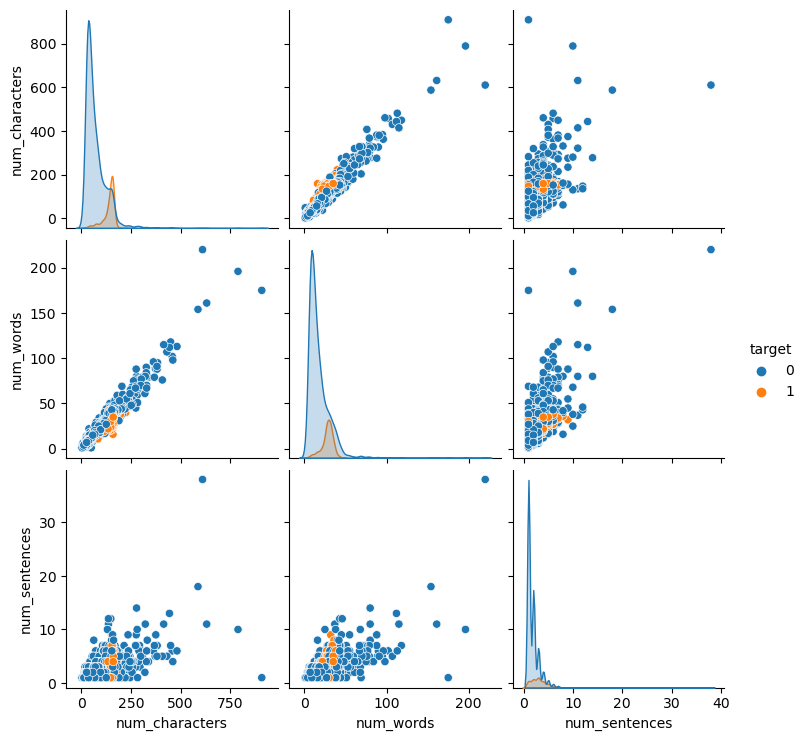

In [145]:
sns.pairplot(df,hue='target')

In [146]:
# sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [147]:
import string 
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
ps=PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [148]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [149]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [150]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [151]:
df['transformed_text'] = df['text'].apply(transform_text)

In [152]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [153]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [154]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

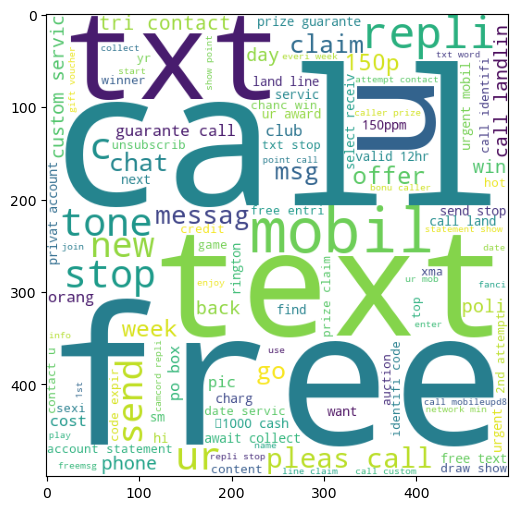

In [155]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [156]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

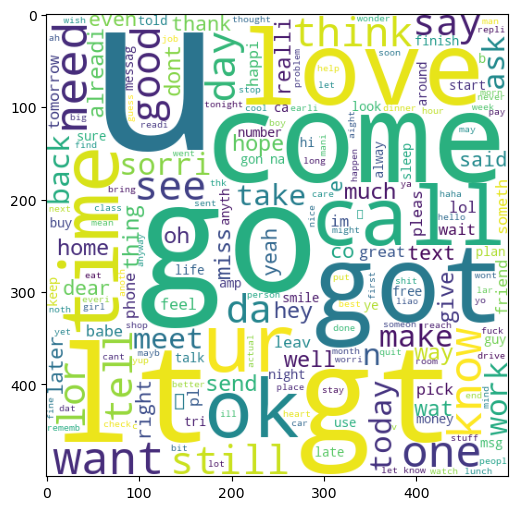

In [157]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [158]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [159]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [160]:
len(spam_corpus)

10048

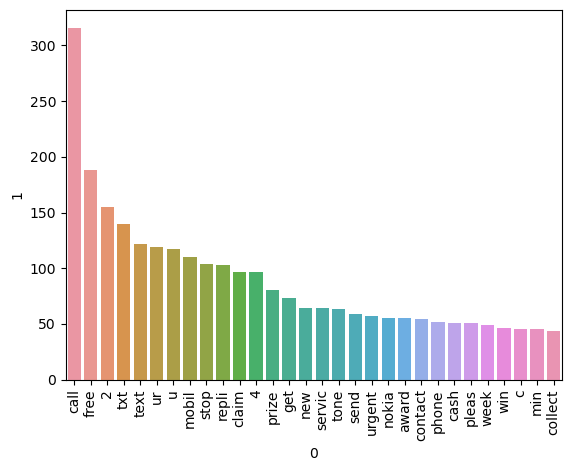

In [161]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [162]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [163]:
len(ham_corpus)

35573

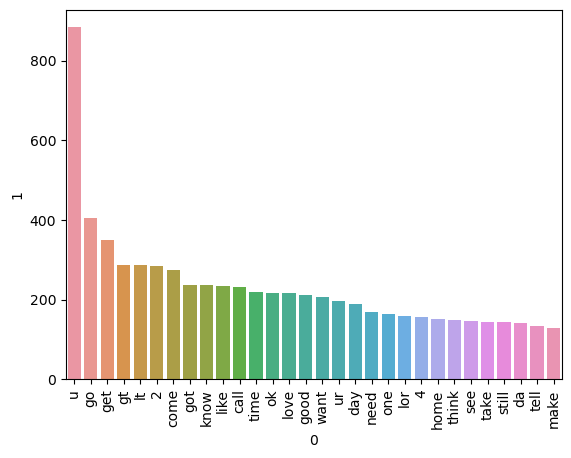

In [164]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [165]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [166]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [167]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [168]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [169]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [170]:
X.shape

(5163, 3000)

In [171]:
y = df['target'].values

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [174]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [175]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [176]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.861568247821878
[[785 127]
 [ 16 105]]
0.4525862068965517


In [177]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9719264278799613
[[911   1]
 [ 28  93]]
0.9893617021276596


In [178]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9796708615682478
[[910   2]
 [ 19 102]]
0.9807692307692307


In [179]:
# tfidf --> MNB

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [217]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [218]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [219]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [220]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9777347531461762, 0.9803921568627451)

In [185]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9777347531461762
Precision -  0.9803921568627451
For  KN
Accuracy -  0.9215876089060987
Precision -  1.0
For  NB
Accuracy -  0.9719264278799613
Precision -  0.9893617021276596
For  DT
Accuracy -  0.936108422071636
Precision -  0.8021978021978022
For  LR
Accuracy -  0.9554695062923524
Precision -  0.9310344827586207
For  RF
Accuracy -  0.972894482090997
Precision -  0.979381443298969
For  AdaBoost
Accuracy -  0.9622458857696031
Precision -  0.9270833333333334
For  BgC
Accuracy -  0.9593417231364957
Precision -  0.8376068376068376
For  ETC
Accuracy -  0.9816069699903195
Precision -  0.9811320754716981
For  GBDT
Accuracy -  0.952565343659245
Precision -  0.95
For  xgb
Accuracy -  0.9612778315585673
Precision -  0.900990099009901


In [186]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [187]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.921588,1.000000
2,NB,0.971926,0.989362
8,ETC,0.981607,0.981132
0,SVC,0.977735,0.980392
5,RF,0.972894,0.979381
9,GBDT,0.952565,0.950000
4,LR,0.955470,0.931034
6,AdaBoost,0.962246,0.927083
10,xgb,0.961278,0.900990
7,BgC,0.959342,0.837607


In [188]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [189]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.921588
1,NB,Accuracy,0.971926
2,ETC,Accuracy,0.981607
3,SVC,Accuracy,0.977735
4,RF,Accuracy,0.972894
5,GBDT,Accuracy,0.952565
6,LR,Accuracy,0.955470
7,AdaBoost,Accuracy,0.962246
8,xgb,Accuracy,0.961278
9,BgC,Accuracy,0.959342


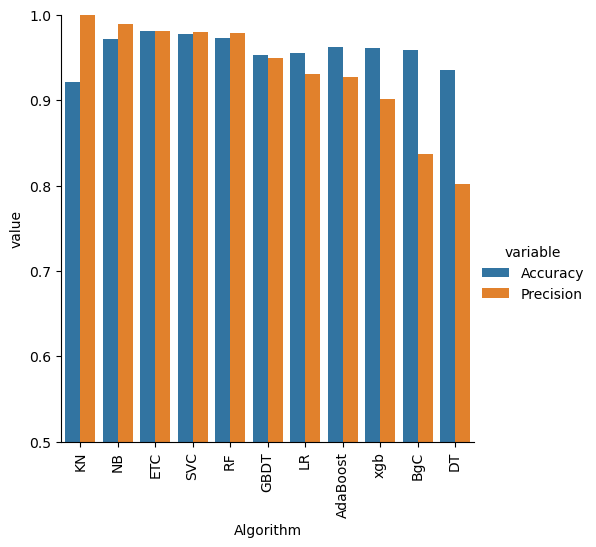

In [190]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [191]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [192]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [193]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [194]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [195]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [196]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [197]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.921588,1.000000,0.921588,1.000000,0.921588,1.000000,0.921588,1.000000
1,NB,0.971926,0.989362,0.971926,0.989362,0.971926,0.989362,0.971926,0.989362
2,ETC,0.981607,0.981132,0.981607,0.981132,0.981607,0.981132,0.981607,0.981132
3,SVC,0.977735,0.980392,0.977735,0.980392,0.977735,0.980392,0.977735,0.980392
4,RF,0.972894,0.979381,0.972894,0.979381,0.972894,0.979381,0.972894,0.979381
5,GBDT,0.952565,0.950000,0.952565,0.950000,0.952565,0.950000,0.952565,0.950000
6,LR,0.955470,0.931034,0.955470,0.931034,0.955470,0.931034,0.955470,0.931034
7,AdaBoost,0.962246,0.927083,0.962246,0.927083,0.962246,0.927083,0.962246,0.927083
8,xgb,0.961278,0.900990,0.961278,0.900990,0.961278,0.900990,0.961278,0.900990
9,BgC,0.959342,0.837607,0.959342,0.837607,0.959342,0.837607,0.959342,0.837607


In [198]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [199]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [200]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [201]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816069699903195
Precision 0.9811320754716981


In [202]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [203]:
from sklearn.ensemble import StackingClassifier

In [204]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [205]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9854791868344628
Precision 0.9732142857142857


In [211]:

model = MultinomialNB()
model.fit(X_train, y_train)
predicted_labels = model.predict(X_test)
print("Accuracy",accuracy_score(y_test,predicted_labels))
print("Precision",precision_score(y_test,predicted_labels))

Accuracy 0.9719264278799613
Precision 0.9893617021276596


In [212]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))

In [ ]:
!pip install wordcloud

In [ ]:
!pip install xgboost